In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
stellar_df = pd.read_csv("star_classification.csv")
stellar_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842


In [2]:
# Drop the non-beneficial ID columns
df_mod = stellar_df.drop(columns=["obj_ID","run_ID","rerun_ID","spec_obj_ID","MJD", "plate", "fiber_ID", "cam_col", "cam_col", "field_ID"])
df_mod.head(10)

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
5,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,QSO,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,QSO,0.586455
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,GALAXY,0.477009
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,GALAXY,0.660012
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,STAR,-0.000008


In [3]:
# Determine the number of unique values in each column.
df_mod.nunique()

alpha       99997
delta       99999
u           93748
g           92651
r           91901
i           92019
z           92007
class           3
redshift    94677
dtype: int64

In [4]:
class_counts = df_mod["class"].value_counts()
print(class_counts)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


<AxesSubplot:ylabel='Density'>

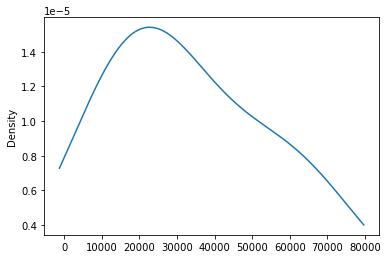

In [5]:
# Visualize the value counts of APPLICATION_TYPE
class_counts.plot.density()

In [7]:
# Generate our categorical variable lists
class_cat = df_mod.dtypes[df_mod.dtypes == "object"].index.tolist()

In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_mod[class_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(class_cat)
encode_df.head()

C:\Users\john.molenda\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,class_GALAXY,class_QSO,class_STAR
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [10]:
# Merge one-hot encoded features and drop the originals
class_df = df_mod.merge(encode_df,left_index=True, right_index=True)
class_df = df_mod.drop(class_cat,1)
class_df.head()

C:\Users\john.molenda\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


In [12]:
# Split our preprocessed data into our features and target arrays
y = class_df["class"].values
X = class_df.drop(["class"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

KeyError: 'class'